In [2]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pylab as plt
import cv2

## Leer todas las imagenes y guardarlas en variables

In [16]:
dog_files = glob('training_set/dogs/*.jpg')
cat_files = glob('training_set/cats/*.jpg')

In [19]:
img_mp1 = plt.imread(cat_files[20])
img_cv2 = cv2.imread(cat_files[20])

In [30]:
img_mp1.shape, img_cv2.shape

((499, 474, 3), (499, 474, 3))

## Demostracion image array

<img src="https://editor.analyticsvidhya.com/uploads/488590%20CI5wgSszZnpHu5Ip.png" alt="imgpixels" style="height: 200px; width:600px;">

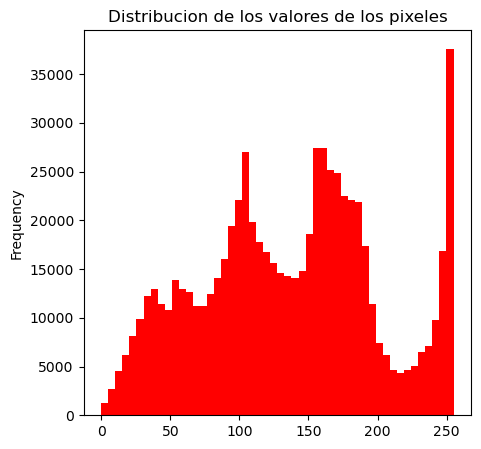

In [53]:
pd.Series(img_mp1.flatten()).plot(kind="hist",
                                  bins=50,
                                  title="Distribucion de los valores de los pixeles",
                                  color="red",
                                  figsize=(5,5))
plt.show()

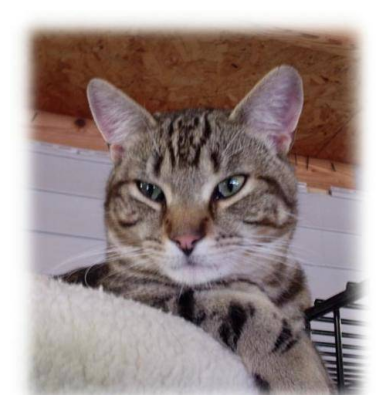

In [49]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img_mp1)
ax.axis('off')
plt.show()

## Mostrar los canales rgb de una imagen

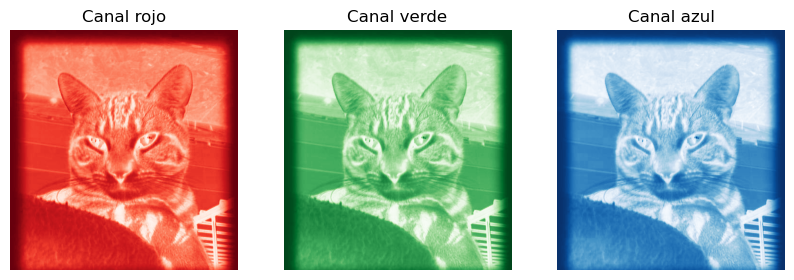

In [55]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(img_mp1[:,:,0], cmap='Reds')
axs[1].imshow(img_mp1[:,:,1], cmap='Greens')
axs[2].imshow(img_mp1[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Canal rojo')
axs[1].set_title('Canal verde')
axs[2].set_title('Canal azul')
plt.show()

## Diferencias entre arrays de cv2 y matplotlib
<h3>cv2 los lee en formato BGR.<br>
matplotlib los lee en formato RGB</h3>

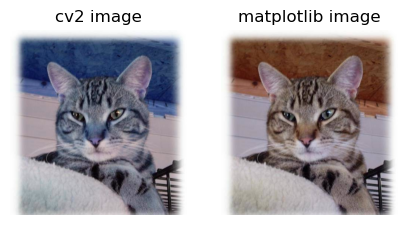

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(5, 5))
axs[0].imshow(img_cv2)
axs[1].imshow(img_mp1)
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('cv2 image')
axs[1].set_title('matplotlib image')
plt.show()

## Convertir imagen de cv2 a rgb

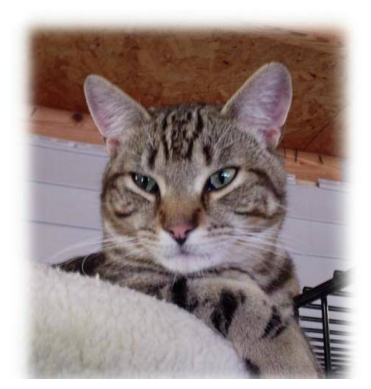

In [75]:
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_cv2_rgb)
ax.axis('off')
plt.show()

## Manipulacion de imagenes

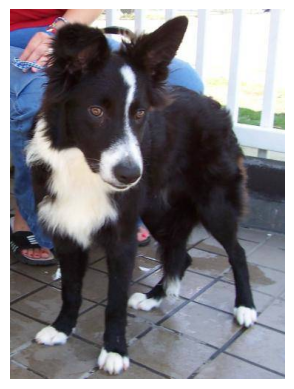

In [106]:
img = plt.imread(dog_files[54])
fig, ax = plt.subplots()
ax.imshow(img)
ax.axis('off')
plt.show()

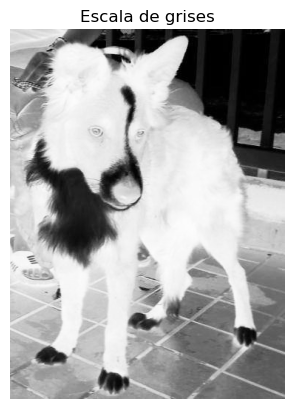

In [117]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots()
ax.imshow(img_gray, cmap='Greys')
ax.axis('off')
ax.set_title('Escala de grises')
plt.show()

## Resizing and scaling

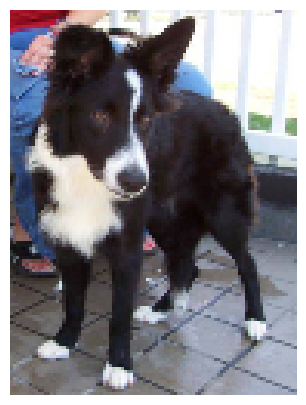

In [121]:
img_resized = cv2.resize(img, None, fx=0.25, fy=0.25)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img_resized)
ax.axis('off')
plt.show()

## Diferente

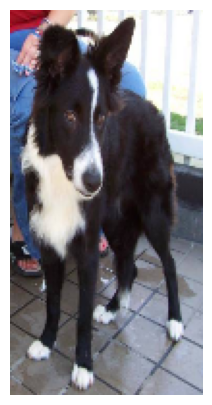

In [122]:
img_resize = cv2.resize(img, (100,200))
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img_resize)
ax.axis('off')
plt.show()

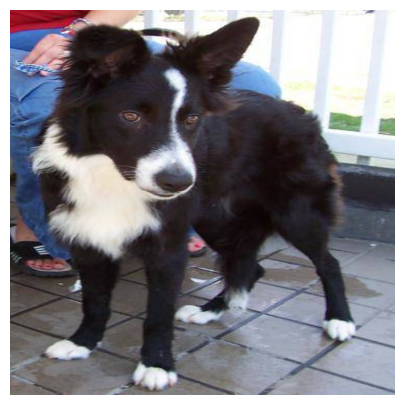

In [123]:
img_resize2 = cv2.resize(img, (5000,5000), interpolation=cv2.INTER_CUBIC) """ Cuando se quiere escalar una imagen,hay que añadirle el
parametro interpolation. este se utiliza para calcular valores de pixeles desconocidos"""
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(img_resize2)
ax.axis('off')
plt.show()

# CV2 Kernerls

<img src="https://editor.analyticsvidhya.com/uploads/81269Capture.PNG" alt="imgpixels" style="width:400px;">

## Agudizar imagen

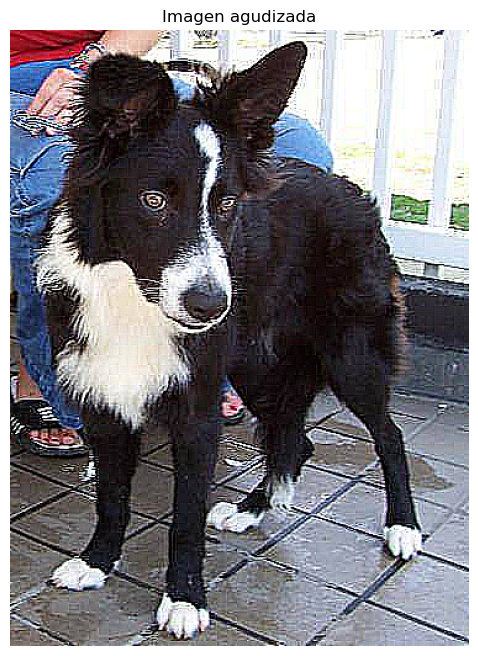

In [145]:
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

sharpened = cv2.filter2D(img, -1, kernel_sharpening)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(sharpened)
ax.axis('off')
ax.set_title('Imagen agudizada')
plt.show()

## Hacer imagen borrosa

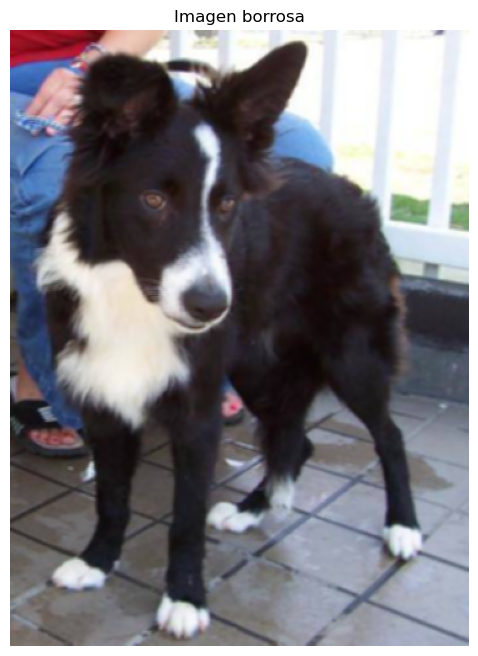

In [126]:
kernel_3x3 = np.ones((3, 3), np.float32) / 9
blurred = cv2.filter2D(img, -1, kernel_3x3)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(blurred)
ax.axis('off')
ax.set_title('Imagen borrosa')
plt.show()

## Guardar imagen

In [146]:
plt.imsave('mpl_dog.png', blurred)
cv2.imwrite('cv2_dog.png', blurred)

True